# Generate Graphs

## Append time vector in the last row

In [17]:
import pandas as pd

def add_seconds_column(input_file, output_file):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Create a new 'seconds' column with incremented values
    df['seconds'] = range(len(df))

    # Write the modified data to the output CSV file
    df.to_csv(output_file, index=False)

    print("New column 'seconds' has been added and incremented successfully!")


# Usage example
input_file = 'input.csv'  # Replace with your input CSV file
output_file = 'output.csv'  # Replace with the desired output CSV file

add_seconds_column(intput_file, output_file)


New column 'seconds' has been added and incremented successfully!


## Delete rows

In [16]:
def remove_column(input_file, output_file, column_index):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Remove the column based on the column index
    df.drop(df.columns[column_index], axis=1, inplace=True)

    # Write the modified data to the output CSV file
    df.to_csv(output_file, index=False)

    print(f"Column at index {column_index} has been removed successfully!")

for i in range(4):
    remove_column(output_file, output_file, 8)
remove_column(output_file, output_file, -1)

Column at index 8 has been removed successfully!
Column at index 8 has been removed successfully!
Column at index 8 has been removed successfully!
Column at index 8 has been removed successfully!
Column at index -1 has been removed successfully!


## Convert Humi and temp data

In [19]:
def multiply_and_add_column(input_file, output_file, column_name, multiply_constant, add_constant):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Multiply the column values by the multiply_constant and add the add_constant
    df[column_name] = df[column_name] * multiply_constant + add_constant

    # Write the modified data to the output CSV file
    df.to_csv(output_file, index=False)

    print(f"Column '{column_name}' has been multiplied by {multiply_constant} and added with {add_constant} successfully!")

multiply_and_add_column(output_file, output_file, 'temp', 165.0/65535.0, -40)
multiply_and_add_column(output_file, output_file, 'humid', 100.0/65535.0, 0)

Column 'humid' has been multiplied by 0.0015259021896696422 and added with 0 successfully!


## Append RS values

In [20]:
import pandas as pd

def convert_rs_and_add_column(input_file, output_file, voltage_column_index):
    # Read the input CSV file
    df = pd.read_csv(input_file)

    # Multiply the column values by the multiply_constant and add the add_constant
    Vad = df[df.columns[voltage_column_index]]
    df[df.columns[voltage_column_index] + '_Rs'] = 4700*((5/(Vad+1.245))-1)

    # Write the modified data to the output CSV file
    df.to_csv(output_file, index=False)

    print(f"Column '{df.columns[voltage_column_index]}' has been converted successfully!")

# convert_rs_and_add_column(output_file, output_file, 0);
for i in range(8):
    convert_rs_and_add_column(output_file, output_file, i);

Column 'ads1_ch0' has been converted successfully!
Column 'ads1_ch1' has been converted successfully!
Column 'ads1_ch2' has been converted successfully!
Column 'ads1_ch3' has been converted successfully!
Column 'ads2_ch0' has been converted successfully!
Column 'ads2_ch1' has been converted successfully!
Column 'ads2_ch2' has been converted successfully!
Column 'ads2_ch3' has been converted successfully!


## Plot time series

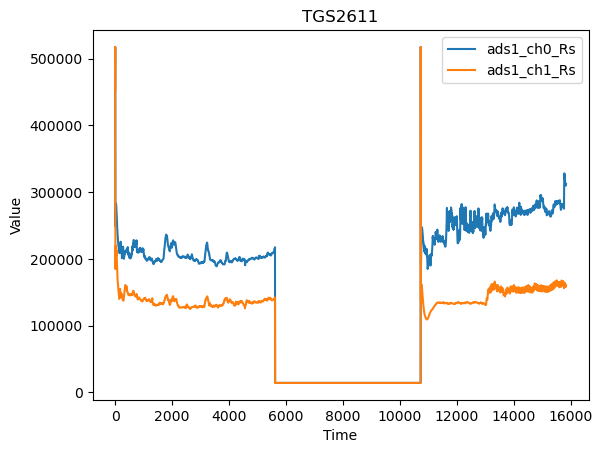

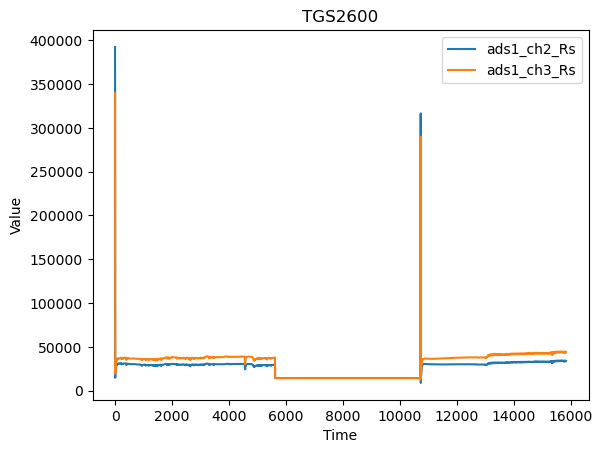

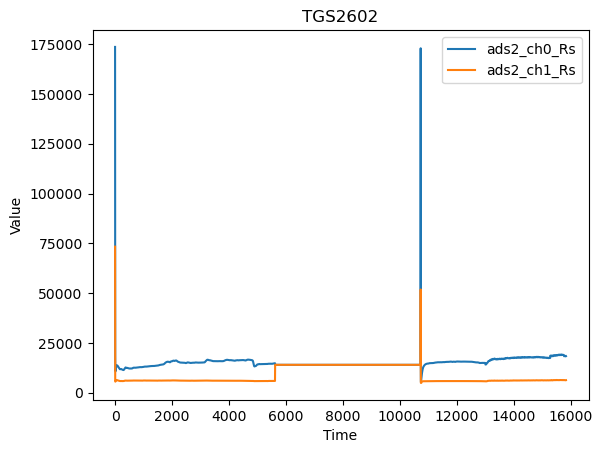

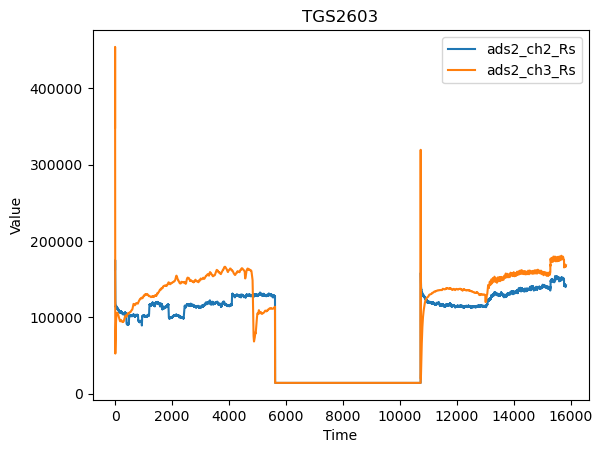

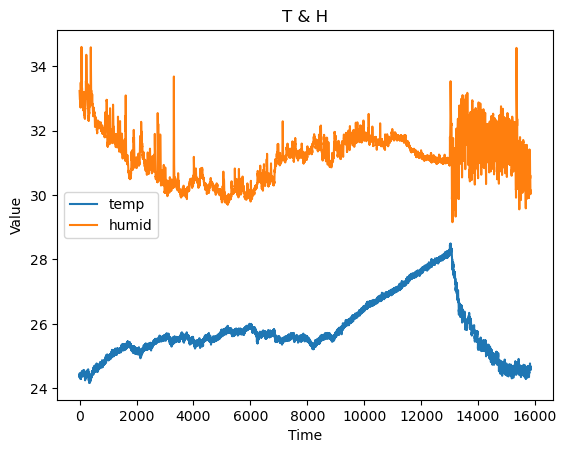

In [23]:
import matplotlib.pyplot as plt

def plot_data_from_csv(csv_file, data1_index, data2_index, graph_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Extract the header names as time vector and data series
    time_vector = 'seconds'
    data1 = df.columns[data1_index]
    data2 = df.columns[data2_index]

    # Create the figure and axis objects
    fig, ax = plt.subplots()

    # Plot the first series of data
    ax.plot(df[time_vector], df[data1], label=data1)

    # Plot the second series of data
    ax.plot(df[time_vector], df[data2], label=data2)

    # Set the labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.set_title(graph_name)

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

plot_data_from_csv(output_file, 11, 12, 'TGS2611')
plot_data_from_csv(output_file, 13, 14, 'TGS2600')
plot_data_from_csv(output_file, 15, 16, 'TGS2602')
plot_data_from_csv(output_file, 17, 18, 'TGS2603')
plot_data_from_csv(output_file, 8, 9, 'T & H')


## Plot FFT

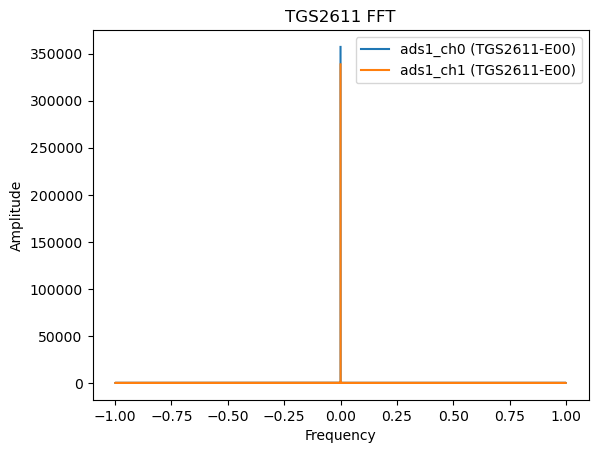

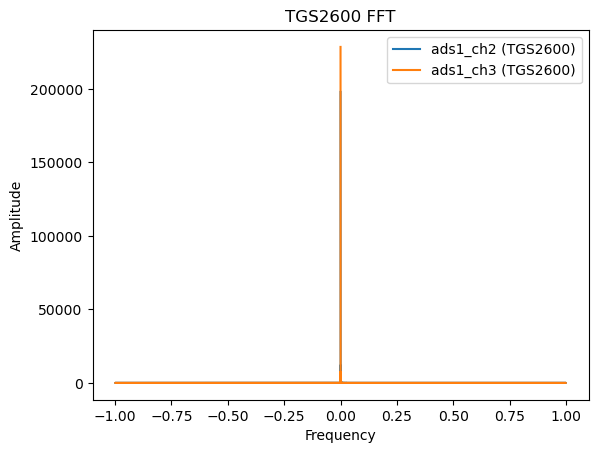

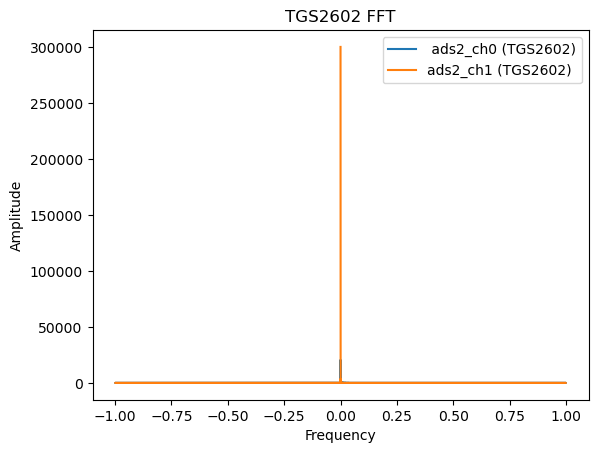

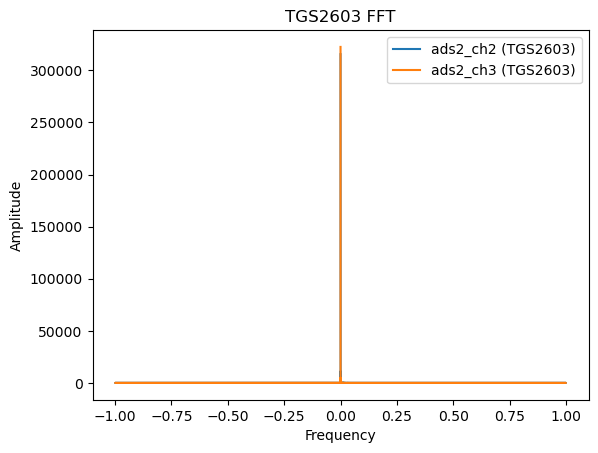

In [9]:
from scipy.fft import fft
from scipy.fft import fftfreq
import numpy as np

def plot_fft_from_csv(csv_file, data1_index, data2_index, graph_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Get the time vector values
    time_vector = df['seconds'].values

    # Get the data series
    data1_series = df.iloc[:, data1_index].values
    data2_series = df.iloc[:, data2_index].values

    # Calculate the FFT
    fft1_values = fft(data1_series)
    fft2_values = fft(data2_series)
    
    # Get the frequency values
    num_samples = len(data1_series)
    sample_rate = np.ceil(num_samples / (time_vector[-1] - time_vector[0]))
    frequencies = fftfreq(num_samples, d=1/sample_rate)

    # Plot the FFT values
    fig, ax = plt.subplots()
    ax.plot(frequencies, np.abs(fft1_values),label=df.columns[data1_index])
    ax.plot(frequencies, np.abs(fft2_values),label=df.columns[data2_index])
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Amplitude')
    ax.set_title(graph_name)
    ax.legend()
    # Show the plot
    plt.show()
plot_fft_from_csv(output_file, 0, 1, 'TGS2611 FFT')
plot_fft_from_csv(output_file, 2, 3, 'TGS2600 FFT')
plot_fft_from_csv(output_file, 4, 5, 'TGS2602 FFT')
plot_fft_from_csv(output_file, 6, 7, 'TGS2603 FFT')


## Plot PSD

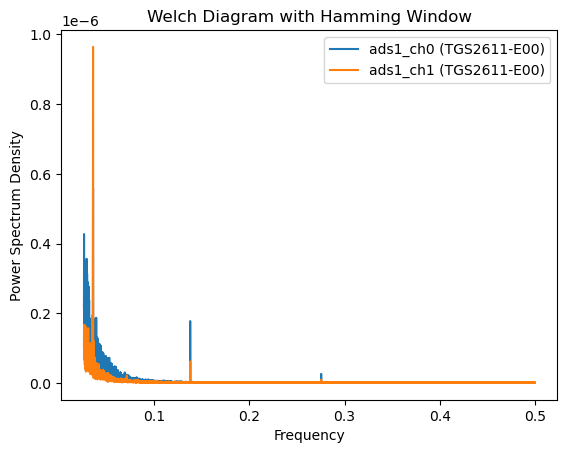

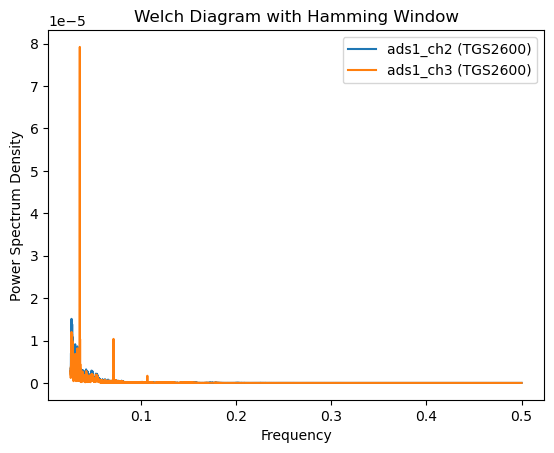

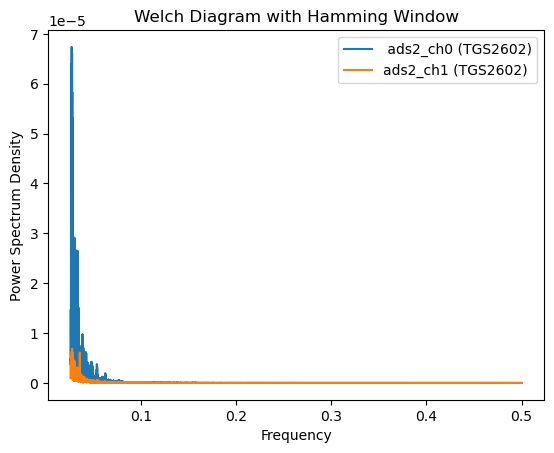

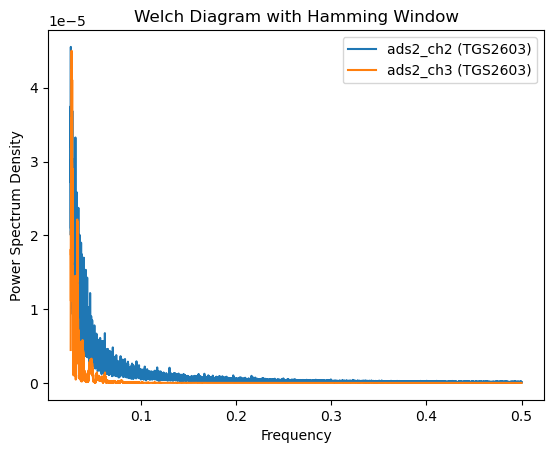

In [13]:
from scipy.signal import welch, hamming
import matplotlib.pyplot as plt

def plot_welch_from_csv(csv_file, data1_index, data2_index, graph_name):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file)

    # Get the time vector values
    time_vector = df['seconds'].values

    # Get the data series
    data1_series = df.iloc[:, data1_index].values
    data2_series = df.iloc[:, data2_index].values

    # Set the parameters for the Welch method
    fs = 1 / np.mean(np.diff(time_vector))  # Sample rate
    nperseg = len(data1_series) // 8  # Segment length
    noverlap = nperseg // 2  # Overlap length

    # Calculate the Welch spectrum
    frequencies1, welch_spectrum1 = welch(
        data1_series, fs=fs, window=hamming(nperseg), nperseg=nperseg, noverlap=noverlap
    )
    frequencies2, welch_spectrum2 = welch(
        data2_series, fs=fs, window=hamming(nperseg), nperseg=nperseg, noverlap=noverlap
    )
    
    # Offset the data
    offset = 1000
    frequencies1 = frequencies1[offset:]
    frequencies2 = frequencies2[offset:]
    welch_spectrum1 = welch_spectrum1[offset:]
    welch_spectrum2 = welch_spectrum2[offset:]

    # Plot the Welch diagram
    fig, ax = plt.subplots()
    ax.plot(frequencies1, welch_spectrum1,label=df.columns[data1_index])
    ax.plot(frequencies2, welch_spectrum2,label=df.columns[data2_index])
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Power Spectrum Density')
    ax.set_title('Welch Diagram with Hamming Window')
    ax.legend()

    # Show the plot
    plt.show()



plot_welch_from_csv(output_file, 0, 1, 'TGS2611 PSD')
plot_welch_from_csv(output_file, 2, 3, 'TGS2600 PSD')
plot_welch_from_csv(output_file, 4, 5, 'TGS2602 PSD')
plot_welch_from_csv(output_file, 6, 7, 'TGS2603 PSD')
